Report 2: Predicting Ratings in the IT Job Market
By: Aarav Shetty

The link to the data set is https://www.kaggle.com/datasets/noeyislearning/it-job-market-insights.

This data set looks at the ratings of different IT jobs. The data set contains ratings for certain companies, as well as the reviews that employees mostly gave to the companies. These reviews indicate if the company gives good job security, a good work-life balance, and more. Analyizing this dataset, and predicting if a job is good based on certain attributes, can help others choose better IT jobs to apply for. 

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as sms
from sklearn.model_selection import train_test_split
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import fetch_openml
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc

In [2]:
filename = "companies.csv"
data = pd.read_csv(filename)

In [67]:
data = data.fillna("")
data

,company_name,rating,reviews,jobs,interviews,highly_rated_for,critically_rated_for
0,TCS,3.7,82.7k,37,9.8k,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits, Wor..."
1,Accenture,3.9,51.5k,32.7k,7.5k,"Company Culture, Job Security, Skill Developme...",Promotions / Appraisal
2,Cognizant,3.8,46.4k,1.3k,5.3k,,"Promotions / Appraisal, Salary & Benefits"
3,Wipro,3.7,46.3k,595,5.1k,Job Security,"Promotions / Appraisal, Salary & Benefits"
4,Capgemini,3.8,38.2k,1.2k,4.5k,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits"
...,...,...,...,...,...,...,...
2355,C-Edge Technologies,4.0,338,3,23,"Job Security, Work Life Balance, Company Culture","Promotions / Appraisal, Salary & Benefits"
2356,Powerweave,3.4,338,2,19,,"Promotions / Appraisal, Skill Development / Le..."
2357,GTL Infrastructure,4.5,338,--,8,"Work Life Balance, Company Culture, Job Security",
2358,Adarsh Credit Co-Operative Society,4.0,337,--,3,"Skill Development / Learning, Work Satisfactio...",


In [68]:
df = data[["company_name", "rating", "reviews", "jobs", "interviews"]]

The code under is used to convert two lists of attributes, the good and the bad, into numerical data. This is done so models such as KNN can be used as a classifier.

In [69]:
highrated = ["Yes Job Security", "Yes Work Life Balance", "Yes Company Culture", "Yes Skill Development / Learning", "Yes Salary & Benefits", "Yes Promotions / Appraisal", "Yes Work Satisfaction"]



lowrated = ["Bad Job Security", "Bad Work Life Balance", "Bad Company Culture", "Bad Skill Development / Learning", "Bad Salary & Benefits", "Bad Promotions / Appraisal", "Bad Work Satisfaction"]


addedColumns = pd.DataFrame(0, index=df.index, columns=highrated + lowrated)

df = pd.concat([df, addedColumns], axis=1)

In [70]:
#1 means the attribute was marked by employees, while 0 means the attribute wasn't.
counter = 0
for i in data["highly_rated_for"]:
    splitted = i.split(', ')
    if splitted != ['']:
        for j in splitted:
            df.loc[counter, "Yes " + j] = 1
    counter+=1

counter = 0
for i in data["critically_rated_for"]:
    splitted = i.split(', ')
    if splitted != ['']:
        for j in splitted:
            df.loc[counter, "Bad " + j] = 1
    counter+=1

In [71]:
print(df)

                            company_name  rating reviews   jobs interviews  \
0                                    TCS     3.7   82.7k     37       9.8k   
1                              Accenture     3.9   51.5k  32.7k       7.5k   
2                              Cognizant     3.8   46.4k   1.3k       5.3k   
3                                  Wipro     3.7   46.3k    595       5.1k   
4                              Capgemini     3.8   38.2k   1.2k       4.5k   
...                                  ...     ...     ...    ...        ...   
2355                 C-Edge Technologies     4.0     338      3         23   
2356                          Powerweave     3.4     338      2         19   
2357                  GTL Infrastructure     4.5     338     --          8   
2358  Adarsh Credit Co-Operative Society     4.0     337     --          3   
2359                       ArcelorMittal     4.0     337     13         27   

      Yes Job Security  Yes Work Life Balance  Yes Company Cult

https://www.w3schools.com/python/python_lambda.asp  
https://www.geeksforgeeks.org/replace-values-in-pandas-dataframe-using-regex/  
These websites were used to learn concepts related to converting the numbers to a more useable form.


This code below simply converts string data into integer data, which is done to help models work well. Furthermore, the ratings, which were on a scale of 0-5, were converted into good or bad ratings. Ratings that were about 3.5 were considered good. 

In [72]:
thousands = ["reviews", "jobs", "interviews"]
for i in thousands:
    df[i] = df[i].replace({'k': ''}, regex=True)
    df[i] = df[i].replace({'--': '0'}, regex=True).astype(float)
    df[i] = df[i].apply(lambda x: x * 1000 if 'k' in str(x) else x)
    df[i].replace(0, pd.NA).median()

#1 is good and 0 is bad for rating
df['rating'] = df['rating'].apply(lambda x: 1 if x > 3.5 else 0)
df = df.drop('company_name', axis = 1)
df = df.astype(int)
y = df['rating']
X = df.drop('rating', axis = 1)

Next, the removal of colinear features were done. This was done below because many features are similar, so including multiple colinear features in a data set would weigh those certain features more than others. In the case of this data set, there weren't any colinear features(which is seen in the heat map), so no features had to be dropped.

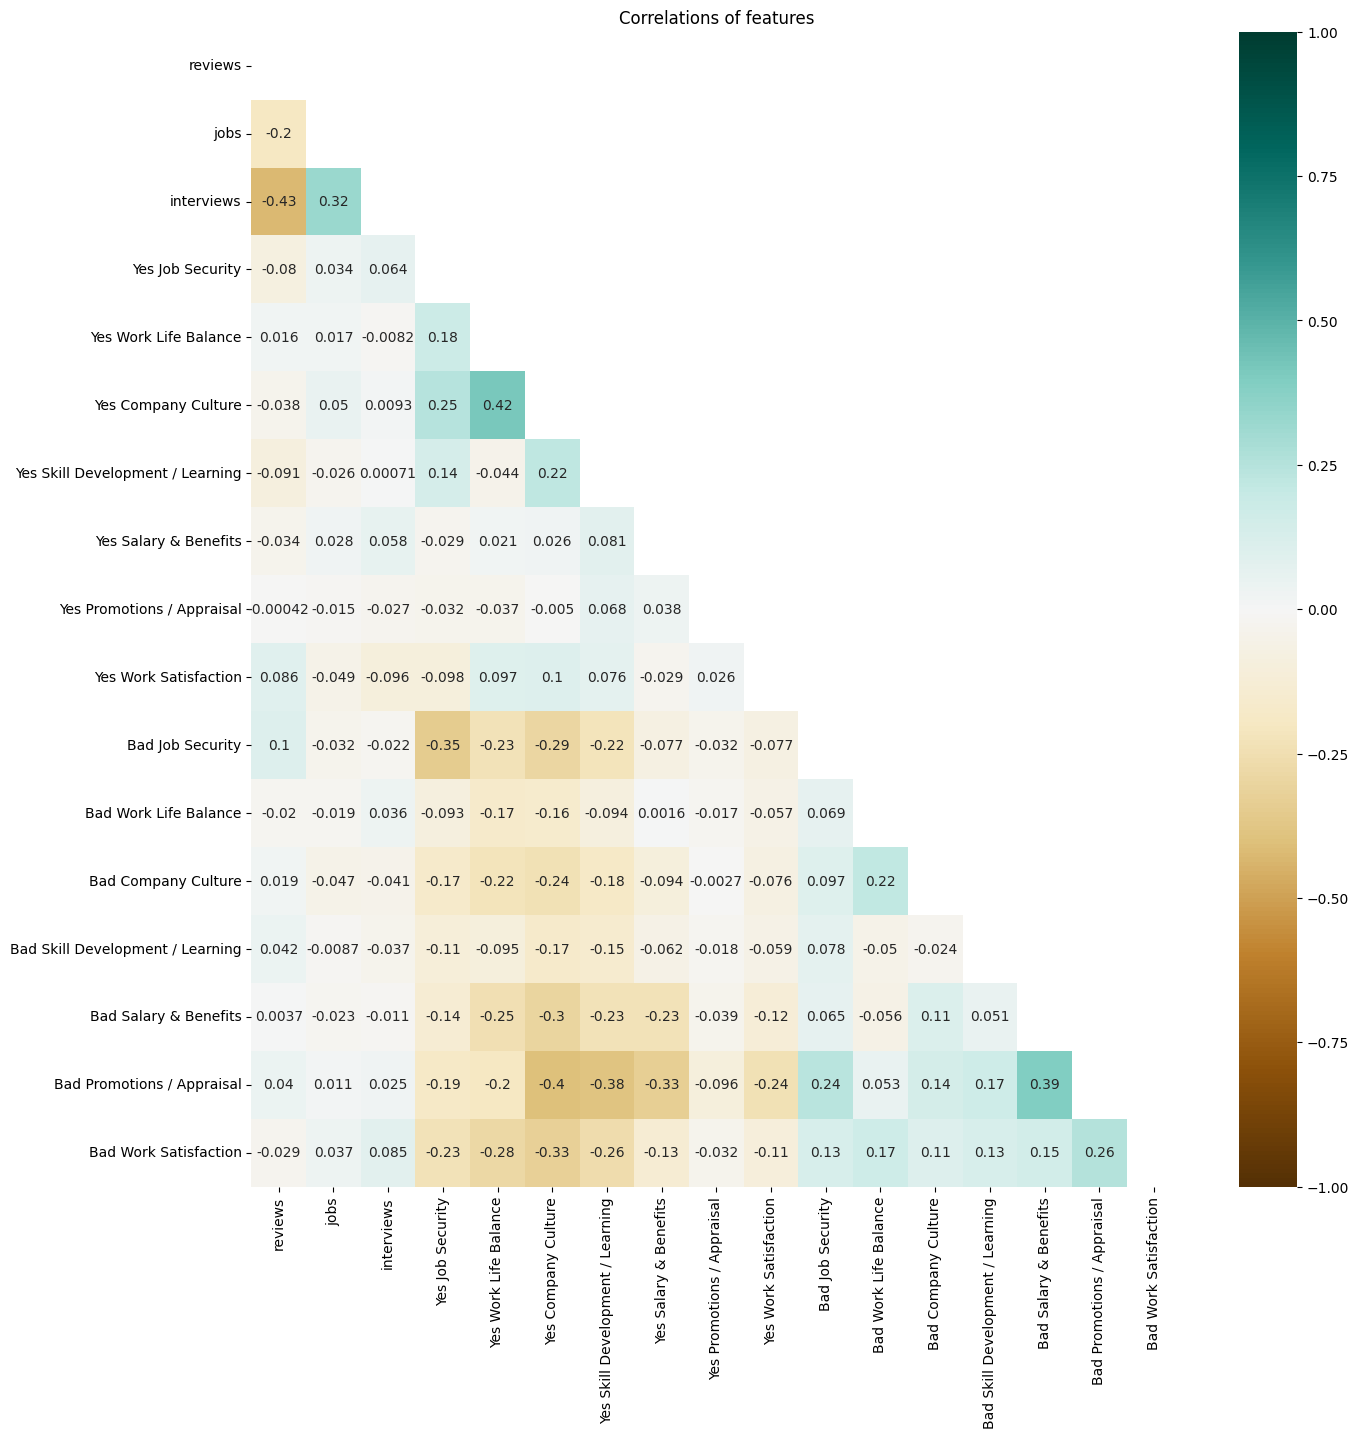

In [97]:
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns





for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])
corr_matrix = X.corr()


mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
fig = plt.gcf()  
fig.set_size_inches(15, 15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("Correlations of features")
plt.show();

The next method of data manipulation done was normalizing the data with a scaler. By using a histogram to visualize the data, it is seen that many features have largely different values, such as jobs available and any of the attributes(Job security, work-life balance, etc). By normalizing the data, a xscalar data set was created in which each feature had values of similar magnitudes, therefore making sure no features outweigh another for a model. 


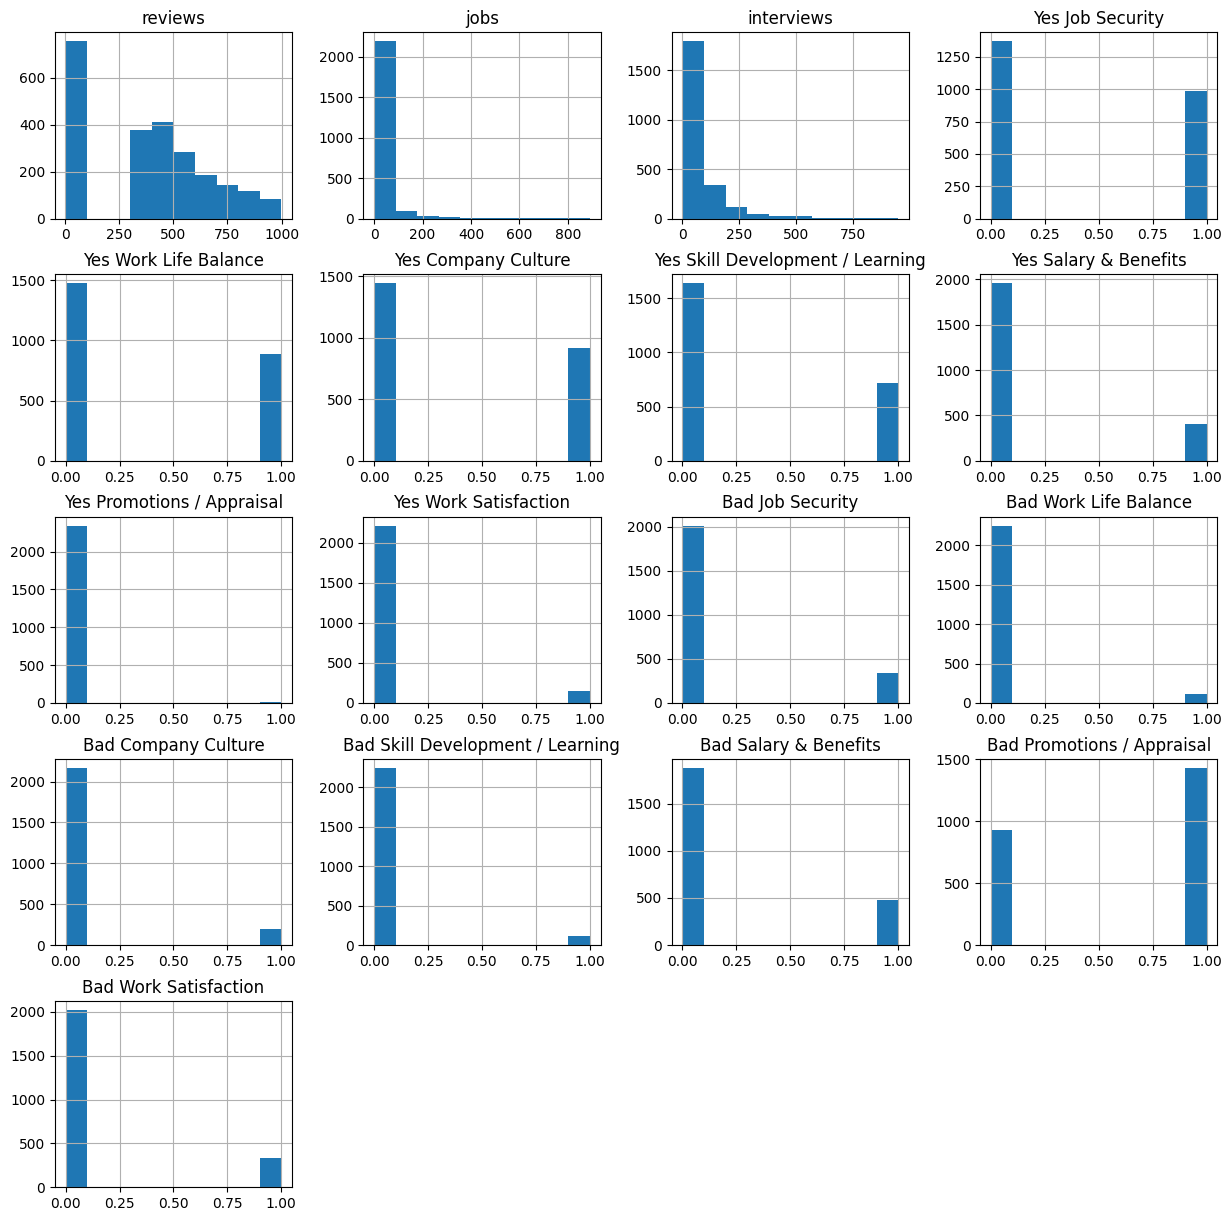

In [74]:
X.hist(figsize=(15,15));

In [75]:
scaler = MinMaxScaler()
xscaler = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

Below is the method that is used throughout the notebook in order to get the amount of true positives, false negatives, and area under the curve, in order to plot the ROC curves for each model.

In [15]:
def getROCData(clf):
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    return fpr, tpr, roc_auc



The code below finally starts using models to classify the data. When choosing a good model to use, it is important to see which parameters make the most optimal model. The method of grid searching is used to find these parameters. Grid search tests all possible parameters, indicating which will result in the highest accuracy. This returns which parameters are shown to be the most optimal. Grid search also uses cross validation, which will be explained later, to determine which parameters result in the high accuracy, despite possible accuracy variance.

The first model used is a decision tree, which uses a binary tree to predict the labels of points. As shown below, an optimal decision tree model for this data set would use gini calculations to determine nodes, as well as have a max tree depth of 20, in order to not overfit or underfit the data. The optimal model does limit the features used to classify(The max amount of features used is the sqrt of total features) and the model has atleast 3 samples per node, which prevents the tree from having too many nodes with less samples, hence stopping overfitting.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(xscaler,y,test_size = 0.2)

In [78]:



# Create pipeline
pipeline = make_pipeline(DecisionTreeClassifier())

# Define parameter grid
param_grid = {
    'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 8, 10, 15, 20, 25],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 3, 4, 5, 8, 10, 15, 20, 25],    
    'decisiontreeclassifier__max_features': ['sqrt', 'log2', None],  
    'decisiontreeclassifier__criterion': ['gini', 'entropy']  
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6,
                                                               8, 10, 15, 20,
                                                               25],
                         'decisiontreeclassifier__max_features': ['sqrt',
                                                                  'log2',
                                                                  None],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 3,
                                                                      4, 5, 8,
                                                                      10, 15,
                                                                      20, 25]},
             scoring='accuracy')

In [80]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_leaf': 3}


In [81]:
DT = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, max_features= "sqrt", min_samples_leaf= 3)
DT.fit(X_train, y_train)
fprDT, tprDT, roc_aucDT = getROCData(DT)

The code below uses cross validiation to determine what is the average accuracy that a decision tree makes for this dataset. This is done by splitting the training set into multiple different subsets, hence giving more datapoints to determine average accuracy. 

In [17]:
scores = cross_val_score(DT, X_train, y_train, cv=20, scoring="accuracy")

In [18]:
pd.Series(scores).describe()

count    20.000000
mean      0.867620
std       0.037773
min       0.808511
25%       0.839474
50%       0.862486
75%       0.893897
max       0.936170
dtype: float64

The next model used is a simple KNN model, which looks at the distance between points to determine classifications. Due to gridsearch, it is seen that the optimal parameters for a KNN model is an n value of 15, a euclidean distance metric, and a leaf size of 1. The leaf size is for the tree that indexes points in the KNN, and a small leaf size is used to make more possible nodes. 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(xscaler,y,test_size = 0.2)


# Create pipeline
pipeline = make_pipeline(KNeighborsClassifier())

# Define parameter grid
param_grid = {
    'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 9, 10, 15, 20],
    'kneighborsclassifier__leaf_size': [1, 2, 3, 4, 5, 8, 10],
    'kneighborsclassifier__metric': ['manhattan', 'euclidean'],
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'kneighborsclassifier__leaf_size': 1, 'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 6}


In [38]:
KNN = KNeighborsClassifier(leaf_size= 1, metric= 'manhattan', n_neighbors= 15)
KNN.fit(X_train, y_train)
fprKNN, tprKNN, roc_aucKNN = getROCData(KNN)
scores = cross_val_score(KNN, X_train, y_train, cv=20, scoring="accuracy")
pd.Series(scores).describe()

count    20.000000
mean      0.891467
std       0.034558
min       0.821053
25%       0.880655
50%       0.894737
75%       0.905263
max       0.957447
dtype: float64

The next model used was a regression model. This model simply uses relationships between variables to predict the value of certain other data points(also used to classify data points). The more optimal parameters was that there will be an intercept for the model-graph to predict data. There was also a low C value, meaning there shouldn't be weights used in the regression. Furtheremore, grid-search shows that 100 iterations are optimal when determining the relationships between features and the target. Looking at the mean accuracy of the logistic regression, it is seen that out of all the models used so far, it is the most accurate with a score of 0.91.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(xscaler,y,test_size = 0.2)


# Create pipeline
pipeline = make_pipeline(LogisticRegression())

# Define parameter grid
param_grid = {
    'logisticregression__fit_intercept': [True, False],
    'logisticregression__C': [0.1, 1, 10, 100],  
    'logisticregression__max_iter': [100, 150, 200, 300],
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'logisticregression__C': 100, 'logisticregression__fit_intercept': True, 'logisticregression__max_iter': 100}


In [82]:
LG = LogisticRegression(C= 100, fit_intercept= True, max_iter=100)
LG.fit(X_train, y_train)
fprLG, tprLG, roc_aucLG = getROCData(LG)
scores = cross_val_score(LG, X_train, y_train, cv=20, scoring="accuracy")
pd.Series(scores).describe()

count    20.000000
mean      0.907811
std       0.026234
min       0.852632
25%       0.883903
50%       0.914894
75%       0.925532
max       0.957895
dtype: float64

The first ensemble method, which are methods that combine models to improve accuracy, was voting. This method is done below by determining classifications using logistic regression, KNN, and decision tree models, and then using a voting system to decide what to label the point. This voting can be done normally, in a true democracy voting system, or the voting can be soft, which means the probabilities of certain labels are voted on by the models. As seen below, both voting methods do result in a better accuracy than decision trees, but they are similar to the KNN model and are worse than the logistic regression model. 

In [41]:
voting_clf = VotingClassifier(
    estimators=[
        ('logistic regression', LG),
        ('Decision Tree', DT),
        ('KNN', KNN)])
voting_clf.fit(X_train, y_train)
for name, clf in voting_clf.named_estimators_.items():
    print(f"{name} = {clf.score(X_test, y_test)}")
print(f"Voting score = {voting_clf.score(X_test, y_test)}")


logistic regression = 0.9152542372881356
Decision Tree = 0.8792372881355932
KNN = 0.902542372881356
Voting score = 0.9152542372881356


In [42]:
voting_clf_soft = VotingClassifier(
    estimators=[
        ('logistic regression', LG),
        ('Decision Tree', DT),
        ('KNN', KNN)], voting = "soft")
voting_clf_soft.fit(X_train, y_train)
for name, clf in voting_clf_soft.named_estimators_.items():
    print(f"{name} = {clf.score(X_test, y_test)}")
print(f"Voting score = {voting_clf_soft.score(X_test, y_test)}")

logistic regression = 0.9152542372881356
Decision Tree = 0.8792372881355932
KNN = 0.902542372881356
Voting score = 0.913135593220339


The next ensemble method used was a form of bagging, which was specifically a random forest classifier. Bagging is a technique that uses random samples of training set data in order to train multiple models. Then by averaging the labels given by the different models, a label is given to the data point. Random forest uses bagging for decision trees, in which different points in training sets can be used more than once. Unfortunately, bagging isn't very sucessfull, improving the decision tree accuracy to only 0.89, which is still worse than regression.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(xscaler,y,test_size = 0.2)


# Create pipeline
pipeline = make_pipeline(RandomForestClassifier())

# Define parameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 150, 200, 300],  
    'randomforestclassifier__max_depth': [None, 10, 20, 30], 
    'randomforestclassifier__max_features': [ 'sqrt', 'log2'],  
    'randomforestclassifier__criterion': ['gini', 'entropy'], 

}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__n_estimators': 100}


In [44]:
RF = RandomForestClassifier(n_estimators= 200, max_depth=  10, max_features = 'sqrt', criterion = 'entropy')
RF.fit(X_train, y_train)
fprRF, tprRF, roc_aucRF = getROCData(RF)
scores = cross_val_score(RF, X_train, y_train, cv=20, scoring="accuracy")
pd.Series(scores).describe()

count    20.000000
mean      0.880246
std       0.032845
min       0.829787
25%       0.859434
50%       0.883595
75%       0.907671
max       0.926316
dtype: float64

After bagging, different boosting models were used. A boosting model, specifically the AdaptiveBoostClassifier used below, will run a model multiple times and add weights to the data points that were mislabeled, so on future runs there will be higher accuracy scores. Unfortunately, this boosting method did not work, which is seen by the AdaBoostClassifier having a score that is less than the RandomForestClassifier, even though the boosting classifier was supposed to improve upon the exisiting model. This may be due to the model running too many times, resulting in overfitting. Because of this, the model repititions were changed from 30 to 10, which increased accuracy, but still not to the point in which it was higher than the base random forest classifier. 

In [45]:
ada = AdaBoostClassifier(RF, n_estimators=10, learning_rate = 0.5, algorithm = "SAMME")
ada.fit(X_train, y_train)
fprAda, tprAda, roc_aucAda = getROCData(ada)

In [46]:
scores = cross_val_score(ada, X_train, y_train, cv=20, scoring="accuracy")
pd.Series(scores).describe()

count    20.000000
mean      0.888208
std       0.033413
min       0.819149
25%       0.870045
50%       0.888914
75%       0.915118
max       0.946809
dtype: float64

The other boosting method attempted was a gradient boost. Gradient boost was applied because this ensemble method uses decision trees that can run at the same time, which each model correcting each other with weights. Still, gradient boost saw similar results to adaptive boost, which both had lower accuracy scores than logistic regression. 

In [47]:
gb= GradientBoostingClassifier(n_estimators = 23)
gb.fit(X_train, y_train)
fprGb, tprGb, roc_aucGb = getROCData(gb)

In [48]:
scores = cross_val_score(gb, X_train, y_train, cv=20, scoring="accuracy")
pd.Series(scores).describe()

count    20.000000
mean      0.888757
std       0.023974
min       0.842105
25%       0.882979
50%       0.893617
75%       0.897116
max       0.936842
dtype: float64

The last ensemble method attempted was stacking. This took three different models, logistric regression, random forest, and knn, and trains a new model based on these prexisting models. This method does seem to have an increased accuracy when compared to the rest of the ensemble methods, with a score of 0.90. Still, this score is likely due to logistric regression being used to train the stacking classifier, so logistric regression should still be credited with being the more accurate model with its accuracy score of 0.92.

In [93]:
stack = StackingClassifier(
    estimators = [
        ('logistic', LG),
        ('random forest', RF),
        ('knn', KNN)
    ],
    final_estimator= MLPClassifier(hidden_layer_sizes=(40,10,5), learning_rate='adaptive', max_iter=10000),
    cv = 5
)

In [94]:
stack.fit(X_train, y_train)
fprStack, tprStack, roc_aucStack = getROCData(stack)

In [51]:
scores = cross_val_score(stack, X_train, y_train, cv=20, scoring="accuracy")
pd.Series(scores).describe()

count    20.000000
mean      0.889244
std       0.033463
min       0.829787
25%       0.867413
50%       0.894737
75%       0.907895
max       0.936842
dtype: float64

In [52]:
print("Individual Accuracies\n")
for name, clf in stack.named_estimators_.items():
    print(f"{name} = {clf.score(X_test, y_test)}")

Individual Accuracies

logistic = 0.9216101694915254
random forest = 0.8961864406779662
knn = 0.9046610169491526


The code below is to visualize the ROC curves for each of the models and stacking methods. 

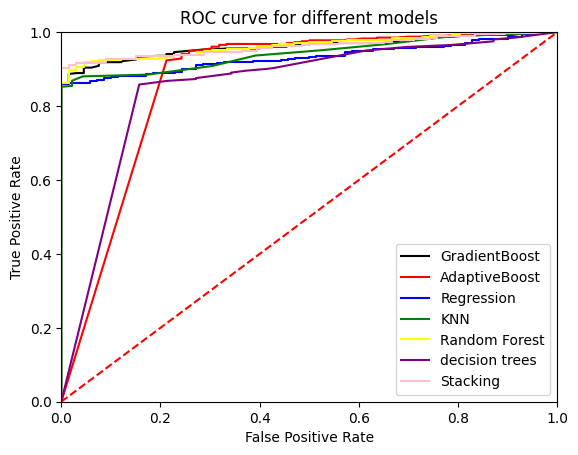

In [83]:
plt.title('ROC curve for different models')
plt.plot(fprGb, tprGb, label = 'GradientBoost' % roc_aucGb, color = "black")
plt.plot(fprAda, tprAda, label = 'AdaptiveBoost' % roc_aucAda, color = "red")

plt.plot(fprLG, tprLG, label = 'Regression' % roc_aucLG, color = "blue")
plt.plot(fprKNN, tprKNN, label = 'KNN' % roc_aucKNN, color = "green")
plt.plot(fprRF, tprRF, label = 'Random Forest' % roc_aucRF, color = "yellow")
plt.plot(fprDT, tprDT, label = 'decision trees' % roc_aucDT, color = "purple")
plt.plot(fprStack, tprStack, label = 'Stacking' % roc_aucAda, color = "pink")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', label = "Random")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

As above, the area under the curve values for gradient boosted regression, random forest, and stacking models were very similar and close to 1. Because the AUC of the stacking curve is greater than the AUC of the regression curve, it can be claimed that the stacking model is indeed the better model for determining company ratings based on attributes. By looking at the curve above, the stacking model always has a higher true positive rate, with a similar false positive rate. 

The threshold of an ROC curve is the point in which it classifies values at certain true positive and false positive rates. By chaning this threshold, the accuracy of a model can be increased, which is done below.

In [95]:
from sklearn.datasets import make_classification
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import make_scorer, f1_score

Xnew, ynew = make_classification(
  n_samples=1_000, weights=[0.1, 0.9])
pos_label = 0
scorer = make_scorer(f1_score, pos_label=pos_label)
#stack is the stacking model used before
base_model = stack
model = TunedThresholdClassifierCV(base_model, scoring=scorer)
print("New model score: ", scorer(model.fit(Xnew, ynew), Xnew, ynew))


New model score:  0.9458128078817734


The final accuracy score of the model is ~0.95. Throughout this notebook, it was initiall thought that the linear regression model would have been the best, with its accuracy score of 0.91. However, after looking at all the models' ROC curves, it is seen that the stacking model(composed of linear regression, random forest, and knn models), has the highest AUC value. After tuning the ROC curve for this stacking model, we came to an accuracy of 0.95. This means that not only did the stacking ensemble method and tuning of the ROC curve threshold lead to an increased score by 0.04, but it also lead to a higher AUC value. 

An accuracy of 0.95 is very good, which means that this model should be able to determine a tech job's rating based on several stats. This can be useful for any person looking to find work in the IT field, due to the model being able to predict if some jobs have high or low ratings. 